# Modelos de Lenguaje

## Librerías

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 500)

# Un Poco de teoría...

¿Qué es un modelo de lenguaje?

* Un modelo de lenguaje es un sistema matemático o algorítmico que predice la probabilidad de una secuencia de palabras en una oración. En otras palabras, es un modelo que nos ayuda a determinar qué tan probable es que una palabra o frase siga a una secuencia dada.

  Por ejemplo, dada la frase incompleta "El perro está", un buen modelo de lenguaje prediría que palabras como "corriendo" o "ladrando" son más probables que "árbol" o "cielo".

* Objetivo de los modelos de lenguaje
  
  El objetivo principal de un modelo de lenguaje es capturar patrones y estructuras en el lenguaje para generar, comprender o completar texto de manera coherente. Esto es crucial para muchas tareas de NLP, como:

  1. Traducción automática
  2. Resumen automático
  3. Respuesta a preguntas
  4. Clasificación de texto


* **Modelos Estadísticos:**

  Antes del auge de las redes neuronales, los modelos de lenguaje tradicionales se basaban en estadísticas. Ejemplos incluyen los modelos de n-gramas, donde se calculan las probabilidades de una palabra dada su contexto en una ventana de palabras anteriores (por ejemplo, una secuencia de 2 o 3 palabras).
  Los n-gramas son secuencias de "n" palabras y, a medida que el valor de "n" aumenta, se captura más contexto. Sin embargo, estos modelos tienen limitaciones: necesitan muchos datos y no generalizan bien, ya que dependen únicamente de las palabras vistas durante el entrenamiento.

  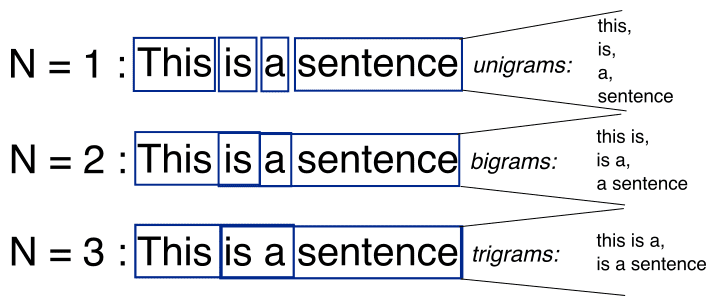

* **Modelos basados en aprendizaje profundo:**

  Con el avance de las redes neuronales, los modelos más recientes (como los Transformers) no dependen de patrones rígidos como los n-gramas, sino que aprenden representaciones más abstractas del lenguaje. Estos modelos pueden aprender a representar el significado de una oración o documento completo en un espacio continuo, lo que permite un entendimiento más profundo del texto.

  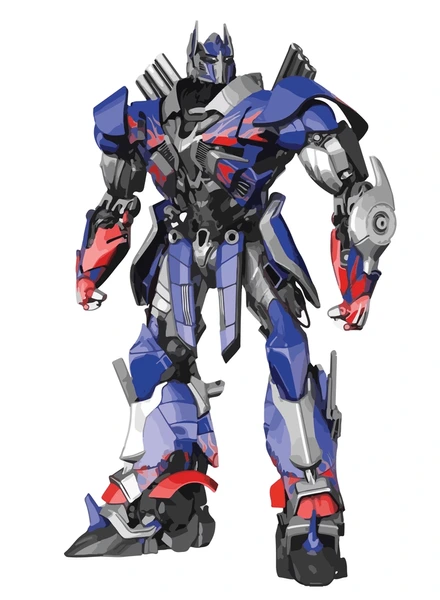

# Modelos Tradicionales de NLP

## Bag of Words (BoW)

* Bag of Words (BoW):

  BoW es uno de los enfoques más simples para representar texto en tareas de NLP.
  
  La idea es:

    Ignorar el orden de las palabras.
    Representar un documento (o frase) como una bolsa que contiene todas las palabras que aparecen en ese texto.
    Se construye un vocabulario de todas las palabras únicas en el conjunto de datos, y cada documento se convierte en un vector en el que cada posición indica cuántas veces aparece una palabra.
  
  Ventajas:

  - Es sencillo de implementar.
  - Funciona bien para tareas básicas de clasificación de texto.
  
  Desventajas:

  - Ignora el orden de las palabras, lo que puede hacer que pierda el contexto.
  - No distingue entre palabras muy comunes (como "el", "la", "y") y palabras que realmente importan en el significado del documento.

### Ejemplo

* Paso 1: Crear un conjunto de datos que ilustre las limitaciones

  Creemos un conjunto de datos simple con frases que varíen en el orden de las palabras y otras que repitan palabras comunes

In [1]:
corpus = [
    "el perro mordió al gato",  # Frase 1
    "el gato mordió al perro",  # Frase 2 (mismas palabras, diferente orden)
    "el perro ladra",           # Frase 3
    "el gato maulla",           # Frase 4
    "el gato duerme",           # Frase 5
    "el perro corre",           # Frase 6
    "perro y gato juegan"       # Frase 7
]

* Paso 2: Implementar BoW

  Ahora convertimos este corpus en una matriz BoW utilizando CountVectorizer.

In [14]:
# Crear el vectorizador de BoW
vectorizer = CountVectorizer()

# Transformar el corpus en una matriz de BoW
X_bow = vectorizer.fit_transform(corpus)

# Mostrar el vocabulario y la matriz BoW
vocabulario = vectorizer.get_feature_names_out()
df = pd.DataFrame(X_bow.toarray(),columns=vocabulario)
df = df.assign(oraciones = corpus)
df

,al,corre,duerme,el,gato,juegan,ladra,maulla,mordió,perro,oraciones
0,1,0,0,1,1,0,0,0,1,1,el perro mordió al gato
1,1,0,0,1,1,0,0,0,1,1,el gato mordió al perro
2,0,0,0,1,0,0,1,0,0,1,el perro ladra
3,0,0,0,1,1,0,0,1,0,0,el gato maulla
4,0,0,1,1,1,0,0,0,0,0,el gato duerme
5,0,1,0,1,0,0,0,0,0,1,el perro corre
6,0,0,0,0,1,1,0,0,0,1,perro y gato juegan


### Identificación de las Ventajas y Desventajas en el Ejemplo

* Ventajas:
  - Simplicidad:

    La matriz BoW es fácil de construir y el vocabulario es claro. No hemos tenido que hacer un procesamiento complejo para representar las frases.
  
  - Funciona con frases cortas:
    En este ejemplo pequeño y controlado, BoW captura la información básica de cuántas veces aparece cada palabra en cada documento.

* Desventajas:

  - Ignora el orden de las palabras:
  
    Observa las dos primeras frases ("el perro mordió al gato" y "el gato mordió al perro"). A pesar de que tienen un significado completamente distinto, la representación BoW es idéntica. Esto ocurre porque BoW no tiene en cuenta el orden en que aparecen las palabras, lo que puede ser un problema cuando el contexto es importante.
  
  - Ponderación igual para todas las palabras:
  
    Palabras como "el" y "al", que son comunes en todos los documentos, reciben el mismo peso que palabras importantes como "perro" o "mordió". Esto significa que BoW no puede diferenciar entre palabras informativas y palabras de relleno.

  - Matriz dispersa:

    En un corpus más grande, el vocabulario podría crecer exponencialmente, lo que generaría una matriz dispersa (sparse matrix). Es decir, la mayoría de los valores en la matriz serían ceros, lo que haría que esta representación sea ineficiente y difícil de manejar.

### Mejorando las desventajas de BoW:

Existen varias maneras de mejorar las limitaciones de BoW:

- Usar n-gramas:
    En lugar de representar palabras individuales, podríamos utilizar secuencias de palabras (n-gramas) para captar un poco más de contexto.
- Aplicar TF-IDF:
    Como veremos más adelante, TF-IDF pondera las palabras en función de su frecuencia, dando menor peso a palabras comunes como "el".
- Embeddings:
    Reemplazar BoW con representaciones más ricas como los embeddings (GloVe, Word2Vec, etc.), que pueden captar las relaciones semánticas entre las palabras.

### Ejemplo

In [23]:
# Usar n-gramas (bigramas)
vectorizer_ngram = CountVectorizer(ngram_range=(1, 2))

# Transformar el corpus en una matriz de bigramas
X_ngram = vectorizer_ngram.fit_transform(corpus)

# Mostrar el vocabulario y la matriz de bigramas
vocabulario_ngram = vectorizer_ngram.get_feature_names_out()

df = pd.DataFrame(X_ngram.toarray(),columns=vocabulario_ngram)
df = df.assign(oraciones = corpus)
df

,al,al gato,al perro,corre,duerme,el,el gato,el perro,gato,gato duerme,gato juegan,gato maulla,gato mordió,juegan,ladra,maulla,mordió,mordió al,perro,perro corre,perro gato,perro ladra,perro mordió,oraciones
0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,el perro mordió al gato
1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,el gato mordió al perro
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,el perro ladra
3,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,el gato maulla
4,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,el gato duerme
5,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,el perro corre
6,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,perro y gato juegan


## TF-IDF (Term Frequency - Inverse Document Frequency)

TF-IDF es una mejora sobre BoW. Además de contar cuántas veces aparece una palabra en un documento, pondera las palabras por su importancia en el corpus general.

Se basa en dos conceptos:

- Frecuencia de términos (TF):
    mide cuántas veces aparece una palabra en un documento.

- Frecuencia inversa de documentos (IDF):
    mide cuán común o rara es una palabra en todos los documentos del conjunto de datos.
    
El resultado es que palabras que son comunes en todos los documentos (como "el", "la", "de") reciben un peso bajo, mientras que palabras raras o importantes reciben un peso mayor.

<br>
<br>

$TF(w, d) = \frac{\text{Número de veces que la palabra } w \text{ aparece en el documento } d}{\text{Número total de palabras en } d}$


$IDF(w) = \log \left( \frac{N}{\text{Número de documentos que contienen la palabra } w} \right)$

Donde $N$ es el número total de documentos.

$TF\text{-}IDF(w, d) = TF(w, d) \times IDF(w)$


### Ventajas y desventajas

* **Ventajas de TF-IDF**
  
  - Ponderación inteligente:

    TF-IDF reduce el peso de las palabras comunes (como "el" o "la") y aumenta el peso de las palabras más raras que pueden ser más importantes para diferenciar entre documentos.
  - Fácil de implementar:
    
    Aunque es más avanzado que BoW, sigue siendo fácil de implementar y no requiere un gran poder computacional.

*  **Desventajas de TF-IDF**
  - Ignora el contexto:
    
    Al igual que BoW, TF-IDF no considera el orden de las palabras ni la estructura gramatical del texto.
    
  - Sensible a datos escasos:
    
    En corpus muy pequeños, TF-IDF puede tener dificultades para calcular correctamente la relevancia, ya que puede no haber suficiente información para hacer una buena diferenciación entre términos.

### Ejemplo

In [26]:
corpus = [
    "el perro mordió al gato",  # Frase 1
    "el gato mordió al perro",  # Frase 2
    "el perro ladra",           # Frase 3
    "el gato maulla",           # Frase 4
    "el gato duerme",           # Frase 5
    "el perro corre",           # Frase 6
    "perro y gato juegan"       # Frase 7
]

In [30]:
# Crear el vectorizador de TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Transformar el corpus en una matriz TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

# Mostrar el vocabulario y la matriz TF-IDF
vocabulario = tfidf_vectorizer.get_feature_names_out()

X_tfidf_dense = X_tfidf.toarray()

df = pd.DataFrame(X_tfidf_dense, columns=vocabulario)
df = df.assign(oraciones=corpus)
df

,al,corre,duerme,el,gato,juegan,ladra,maulla,mordió,perro,oraciones
0,0.561421,0.000000,0.000000,0.321273,0.364964,0.000000,0.000000,0.000000,0.561421,0.364964,el perro mordió al gato
1,0.561421,0.000000,0.000000,0.321273,0.364964,0.000000,0.000000,0.000000,0.561421,0.364964,el gato mordió al perro
2,0.000000,0.000000,0.000000,0.385693,0.000000,0.000000,0.811955,0.000000,0.000000,0.438144,el perro ladra
3,0.000000,0.000000,0.000000,0.385693,0.438144,0.000000,0.000000,0.811955,0.000000,0.000000,el gato maulla
4,0.000000,0.000000,0.811955,0.385693,0.438144,0.000000,0.000000,0.000000,0.000000,0.000000,el gato duerme
5,0.000000,0.811955,0.000000,0.385693,0.000000,0.000000,0.000000,0.000000,0.000000,0.438144,el perro corre
6,0.000000,0.000000,0.000000,0.000000,0.428974,0.794961,0.000000,0.000000,0.000000,0.428974,perro y gato juegan


### Ventajas con el ejemplo

* Ventajas:
  - Reducción del impacto de palabras comunes:
    Palabras muy comunes, como "el" y "al", tienen valores más bajos en los documentos. Esto refleja su menor importancia, ya que aparecen en la mayoría de las frases.
    Por ejemplo, en el documento "el perro ladra", la palabra "el" tiene un valor TF-IDF más bajo que "ladra", lo que indica que "ladra" es una palabra clave en ese documento.
  - Diferencia entre documentos similares:

    A diferencia de BoW, donde las primeras dos frases eran indistinguibles, TF-IDF pondera las palabras en función de su importancia en el corpus completo. Sin embargo, en este caso particular, las dos frases siguen teniendo la misma ponderación, ya que las palabras son las mismas, pero con diferentes órdenes. Esto aún puede verse como una limitación, aunque TF-IDF tiene un mejor rendimiento en casos donde el vocabulario difiere más.
  - Tratamiento adecuado de las palabras raras:

    Palabras como "ladra", "maulla", "duerme", que solo aparecen en una frase, reciben una ponderación alta en su respectiva frase. Esto ayuda a identificar qué palabras son más representativas en cada documento.
* Desventajas:
  - Palabras de baja frecuencia pero irrelevantes:

    Aunque TF-IDF reduce el impacto de palabras comunes, puede seguir dándole importancia a palabras que son raras pero no necesariamente informativas. Si, por ejemplo, un documento usa una palabra técnica muy rara pero irrelevante para el tema, esta podría recibir un valor TF-IDF alto.
  - Problemas con datos escasos:
    
    En conjuntos de datos muy pequeños, TF-IDF puede tener dificultades para distinguir qué palabras son realmente importantes, ya que la frecuencia de palabras será baja en general. Esto puede llevar a ponderaciones inexactas.

### Mejoras

Aunque TF-IDF es un método útil, hay varias maneras de mejorar su rendimiento en tareas más complejas:

- Incluir n-gramas:

Similar a BoW, podemos usar n-gramas para capturar algo de contexto en lugar de solo palabras individuales.
- Embeddings:

Las representaciones de palabras más avanzadas, como Word2Vec o GloVe, pueden capturar relaciones semánticas que TF-IDF no puede, lo que permite una mejor comprensión del significado en lugar de solo frecuencia.

### Ejemplo

In [31]:
# Usar bigramas (n-gramas de 2 palabras)
tfidf_vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 2))

# Transformar el corpus en una matriz de bigramas ponderados con TF-IDF
X_tfidf_ngram = tfidf_vectorizer_ngram.fit_transform(corpus)

# Mostrar el vocabulario y la matriz de n-gramas con TF-IDF
vocabulario_ngram = tfidf_vectorizer_ngram.get_feature_names_out()


X_tfidf_dense = X_tfidf_ngram.toarray()

df = pd.DataFrame(X_tfidf_dense, columns=vocabulario_ngram)
df = df.assign(oraciones=corpus)
df

,al,al gato,al perro,corre,duerme,el,el gato,el perro,gato,gato duerme,gato juegan,gato maulla,gato mordió,juegan,ladra,maulla,mordió,mordió al,perro,perro corre,perro gato,perro ladra,perro mordió,oraciones
0,0.357923,0.431188,0.000000,0.000000,0.000000,0.204822,0.000000,0.305941,0.232676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.357923,0.357923,0.232676,0.000000,0.000000,0.000000,0.431188,el perro mordió al gato
1,0.357923,0.000000,0.431188,0.000000,0.000000,0.204822,0.305941,0.000000,0.232676,0.000000,0.000000,0.000000,0.431188,0.000000,0.000000,0.000000,0.357923,0.357923,0.232676,0.000000,0.000000,0.000000,0.000000,el gato mordió al perro
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.273330,0.000000,0.408271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.575411,0.000000,0.000000,0.000000,0.310501,0.000000,0.000000,0.575411,0.000000,el perro ladra
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.273330,0.408271,0.000000,0.310501,0.000000,0.000000,0.575411,0.000000,0.000000,0.000000,0.575411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,el gato maulla
4,0.000000,0.000000,0.000000,0.000000,0.575411,0.273330,0.408271,0.000000,0.310501,0.575411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,el gato duerme
5,0.000000,0.000000,0.000000,0.575411,0.000000,0.273330,0.000000,0.408271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310501,0.575411,0.000000,0.000000,0.000000,el perro corre
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285101,0.000000,0.528342,0.000000,0.000000,0.528342,0.000000,0.000000,0.000000,0.000000,0.285101,0.000000,0.528342,0.000000,0.000000,perro y gato juegan


# Clasificador de Texto

¿Que haremos?

1. Conjunto de datos ampliado: Ahora tenemos 20 comentarios con diferentes etiquetas para entrenar y evaluar el modelo.
2. Transformación con TF-IDF: Convertimos el texto en vectores ponderados con TF-IDF para que el modelo pueda aprender de las características más relevantes.
3. División en entrenamiento y prueba: Utilizamos un 80% de los datos para entrenar el modelo y el 20% restante para probarlo.
4. Clasificación con Logistic Regression: Entrenamos un clasificador simple que predice si un comentario es feliz o triste.
5. Evaluación: Calculamos la precisión del modelo y mostramos un reporte de clasificación con métricas como precisión, recall y F1-score.
Pruebas adicionales: Probamos el modelo con comentarios nuevos y verificamos si el modelo los clasifica correctamente como felices o tristes.

In [37]:
# Conjunto de datos sintéticos ampliado
comentarios = [
    "Me siento muy feliz hoy",  # Feliz
    "Estoy tan contento con mi vida",  # Feliz
    "Qué día tan maravilloso",  # Feliz
    "Estoy triste y no quiero hablar con nadie",  # Triste
    "Me siento deprimido y solo",  # Triste
    "Nada me hace feliz últimamente",  # Triste
    "Todo está bien, me siento bien",  # Feliz
    "Estoy muy triste y no sé qué hacer",  # Triste
    "Me encanta pasar tiempo con mi familia",  # Feliz
    "Hoy fue un día terrible, me siento muy mal",  # Triste
    "Estoy emocionado por el futuro",  # Feliz
    "No tengo ganas de hacer nada",  # Triste
    "Estoy muy agradecido por todo lo que tengo",  # Feliz
    "Me siento abrumado y sin energía",  # Triste
    "Estoy muy ansioso por lo que está pasando",  # Triste
    "Disfruté mucho mi día",  # Feliz
    "Hoy fue un día bastante deprimente",  # Triste
    "Estoy satisfecho con mis logros",  # Feliz
    "Es un día gris y estoy melancólico",  # Triste
    "No puedo dejar de sonreír, estoy feliz",  # Feliz
]

# Etiquetas correspondientes (1 = Feliz, 0 = Triste)
etiquetas = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1]


In [38]:
# Crear el vectorizador de TF-IDF
vectorizador_tfidf = TfidfVectorizer()

# Transformar el corpus en una matriz TF-IDF
X = vectorizador_tfidf.fit_transform(comentarios)

### Ingenieria y entrenamiento del modelo

In [48]:
# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, etiquetas, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predecir en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Calcular Precision, Recall y F1-Score
precision = precision_score(y_test, predicciones, average='binary')
recall = recall_score(y_test, predicciones, average='binary')
f1 = f1_score(y_test, predicciones, average='binary')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.00
Recall: 0.00
F1-Score: 0.00

Reporte de clasificación:
              precision    recall  f1-score   support

      Triste       0.00      0.00      0.00       0.0
       Feliz       0.00      0.00      0.00       4.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

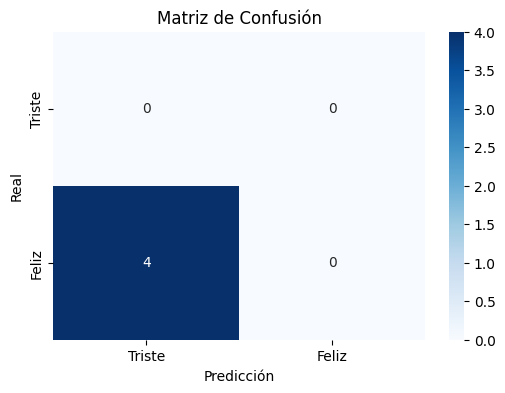

In [49]:
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Mostrar el reporte de clasificación completo
print("\nReporte de clasificación:")
print(classification_report(y_test, predicciones, target_names=["Triste", "Feliz"]))

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Triste", "Feliz"], yticklabels=["Triste", "Feliz"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### Nuevos datos

In [50]:
# Nuevos comentarios para probar
nuevos_comentarios = ["Estoy muy feliz hoy", "Me siento muy triste y solo"]

# Transformar los nuevos comentarios en TF-IDF
X_nuevos = vectorizador_tfidf.transform(nuevos_comentarios)

# Hacer predicciones
predicciones_nuevas = modelo.predict(X_nuevos)

# Mostrar los resultados
for comentario, prediccion in zip(nuevos_comentarios, predicciones_nuevas):
    sentimiento = "Feliz" if prediccion == 1 else "Triste"
    print(f"Comentario: '{comentario}' -> Sentimiento: {sentimiento}")


Comentario: 'Estoy muy feliz hoy' -> Sentimiento: Triste
Comentario: 'Me siento muy triste y solo' -> Sentimiento: Triste
